In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

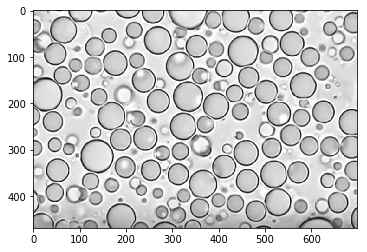

In [2]:
img = cv2.imread("milk.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap="gray")
plt.show()

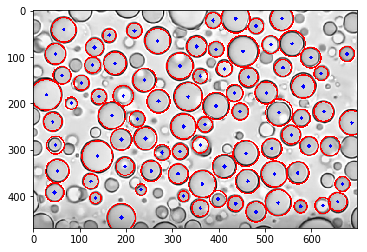

In [3]:
circles = cv2.HoughCircles(img, 
                           cv2.HOUGH_GRADIENT,
                           dp=1,       # internal ratio parameter, usually 1
                           minDist=30, # between centers
                           param1=50,  # parameters of mode (canny edge)
                           param2=50,  # bigger - less false positives
                           minRadius=10,
                           maxRadius=60)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg, (*i[:2],), i[2], (255,0,0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (*i[:2],), 2, (0,0,255), 3)
plt.imshow(cimg)
plt.show()

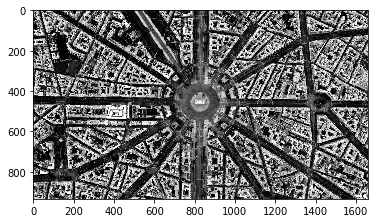

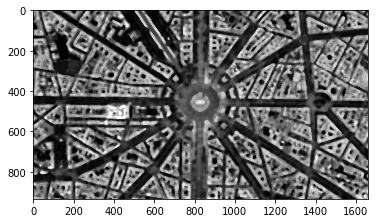

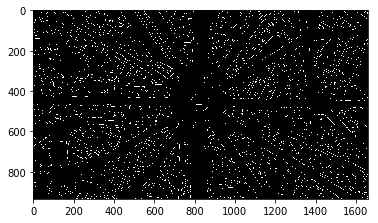

In [4]:
# https://docs.opencv.org/3.1.0/d6/d10/tutorial_py_houghlines.html
img = cv2.imread("paris.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cimg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
plt.imshow(img, cmap="gray")
plt.show()
m = cv2.GaussianBlur(img, ksize=(5, 5), sigmaX=5)

kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
m = cv2.filter2D(m, -1, kernel)

m = cv2.medianBlur(m, 15)
plt.imshow(m, cmap="gray")
plt.show()
edges = cv2.Canny(m, 150, 200)
plt.imshow(edges, cmap="gray")
plt.show()

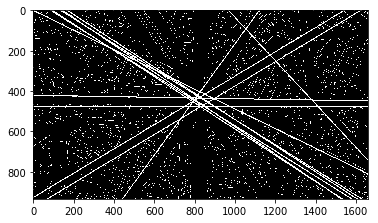

In [5]:
lines = cv2.HoughLines(edges,
                       rho=2,             # distance resolution
                       theta=np.pi/180,   # angle resolution
                       threshold=290,
                       min_theta=0,
                       max_theta=np.pi)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1, y1 = int(x0 + 2000*(-b)), int(y0 + 2000*(a))
    x2, y2 = int(x0 - 2000*(-b)), int(y0 - 2000*(a))
    cv2.line(edges,(x1,y1),(x2,y2), 255, 3)
plt.imshow(edges, cmap="gray")
plt.show()